In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from scipy.spatial import distance as metric
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from math import sqrt
from numpy import dot
from numpy.linalg import norm



In [ ]:
df = pd.read_table('/content/Train.txt',names=['all'])

df[["sepal length","sepal width","petal length","petal width"]] = df['all'].str.split(expand=True)
df = df.drop('all', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
datas = pd.read_csv('/content/handwritten_test.txt',sep=',',header=None)

In [ ]:
for i in df.columns:
    try:
        df[[i]] = df[[i]].astype(float)
    except:
        pass

print(df.dtypes)

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
dtype: object


In [ ]:
X_train = df.values
# X_train

In [ ]:
pca = PCA(.75)
pca.fit(datas)
pca_d = pca.transform(datas)
tsne_d = TSNE(n_components=3).fit_transform(pca_d)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
# x=tempcent
def init_cen(k,sh):
    np.random.seed(0)
    c = np.random.random((k,sh))   
    return c

In [ ]:
def distance(t,c):
    return sqrt(np.sum((t-c)*(t-c)))
    # return cosine_similarity(t, c)
    # return np.linalg.norm(t-c, axis=0)
    # cos_sim = dot(t, c)/(norm(t)*norm(c))
    # return cos_sim
    # return cdist(t, c, 'cosine')

In [ ]:
def kmeans(X_train,nIter,shape,k):
    m = X_train.shape[0]
    cen = init_cen(k,shape)
    k = cen.shape[0]
    dis = np.zeros([m,k])
    cen_ass = np.zeros([m,])
    cen_his = cen
    temp = np.zeros([1,shape])
    count = 0
    for t in range(nIter):
        #print(cen)
        for r in range(0,m):
            for c in range(0,k):
                dis[r][c] = distance(X_train[r],cen[c])
        cen_ass = (np.argmin(dis,axis=1)).reshape((-1,))
        cen_his = np.concatenate((cen_his,cen))
        # print(cen)
        for c in range(0,k):
            temp = np.zeros([1,shape])
            count = 0
            for r in range(0,m):
                temp = temp + (0.99)*(cen_ass[r]==c)*X_train[r]+(0.01)*(cen_ass[r]!=c)*X_train[r]
                count = count + (0.99)*(cen_ass[r]==c)+(0.01)*(cen_ass[r]!=c)
            cen[c] = (temp.reshape((-1,)))/(count)
    return cen,cen_ass,cen_his

In [ ]:
cen,cen_ass,cen_his = kmeans(tsne_d,10,tsne_d.shape[1],10)

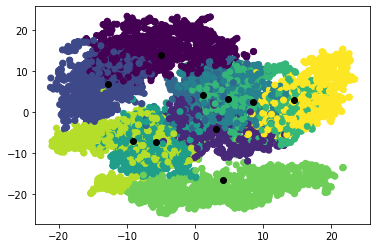

In [ ]:
answer = np.squeeze(np.asarray(cen_ass[:])).astype(np.int64)
c1 = np.squeeze(np.asarray(cen[:,0]))
c2 = np.squeeze(np.asarray(cen[:,1]))
plt.scatter(tsne_d[:, 0], tsne_d[:, 1], c=answer)
plt.scatter(c1, c2, c='black')

In [ ]:
pred=[]
for i in cen_ass:
  pred.append(i+1)
with open('output.txt', 'w') as f:
	for label in cen_ass:
		f.write("%s\n" % label)
f.close()

In [ ]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [ ]:
def kmeans_without_cen_cen_his(X_train,nIter,shape,k):
    m = X_train.shape[0]
    cen = init_cen(k,shape)
    k = cen.shape[0]
    dis = np.zeros([m,k])
    cen_ass = np.zeros([m,])
    cen_his = cen
    temp = np.zeros([1,shape])
    count = 0
    for t in range(nIter):
        #print(cen)
        for r in range(0,m):
            for c in range(0,k):
                dis[r][c] = distance(X_train[r],cen[c])
        cen_ass = (np.argmin(dis,axis=1)).reshape((-1,))
        cen_his = np.concatenate((cen_his,cen))
        # print(cen)
        for c in range(0,k):
            temp = np.zeros([1,shape])
            count = 0
            for r in range(0,m):
                temp = temp + (0.99)*(cen_ass[r]==c)*X_train[r]+(0.01)*(cen_ass[r]!=c)*X_train[r]
                count = count + (0.99)*(cen_ass[r]==c)+(0.01)*(cen_ass[r]!=c)
            cen[c] = (temp.reshape((-1,)))/(count)
    return cen_ass
def sum_of_squared_error(y,y_x):
  summation = 0 
  n = len(y) 
  for i in range (1,n):
    difference = y[i] - y_x[i] 
    squared_difference = difference**2   
    summation = summation + squared_difference  
  return summation/n  
k1 = kmeans_without_cen_cen_his(tsne_d,10,tsne_d.shape[1],10)
errors = []
K = [2,4,6,8,10,12,14,16,18,20]
for k in K:
    k2 = kmeans_without_cen_cen_his(tsne_d,10,tsne_d.shape[1],k)   
    errors.append(sum_of_squared_error(k2,k1))

In [ ]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(tsne_d)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
Sum_of_squared_distances

In [ ]:
from pandas.core.arrays.base import ExtensionArraySupportsAnyAll
plt.plot(K, ExtensionArraySupportsAnyAll, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('k value')
plt.show()

In [ ]:
datx = datas.values

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 1)
y_kmeans = kmeans.fit_predict(datx)

In [ ]:
y_kmeans